In [1]:
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [5]:
import yfinance as yf
import datetime as dt

stock = "NVDA"
start = dt.datetime(2022, 12, 24)
end = dt.datetime(2024, 12, 25)

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [8]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-27,15.074,15.100,14.056,14.121,14.110738,464902000
2022-12-28,13.927,14.262,13.884,14.036,14.025799,351066000
2022-12-29,14.402,14.683,14.227,14.603,14.592384,354923000
2022-12-30,14.334,14.629,14.233,14.614,14.603377,310490000
2023-01-03,14.851,14.996,14.096,14.315,14.304595,401277000


In [10]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-12-18,133.860001,136.699997,128.279999,128.910004,128.910004,277444500
2024-12-19,131.759995,134.029999,129.550003,130.679993,130.679993,209719200
2024-12-20,129.809998,135.279999,128.220001,134.699997,134.699997,306528600
2024-12-23,136.279999,139.789993,135.119995,139.669998,139.669998,176053500
2024-12-24,140.000000,141.899994,138.649994,140.220001,140.220001,105157000


In [15]:
data.shape

(502, 6)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-12-27 to 2024-12-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


In [19]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,71.366611,72.637747,69.953787,71.360528,71.344085,4.269990e+08
std,41.179185,41.874589,40.241100,41.057877,41.058860,1.668636e+08
min,13.927000,14.262000,13.884000,14.036000,14.025799,1.051570e+08
25%,41.561499,42.198251,40.609749,41.442751,41.427360,3.211024e+08
50%,49.649000,49.978500,48.983500,49.500999,49.484797,4.090920e+08
75%,113.672752,116.267500,110.895750,113.768251,113.746088,5.009288e+08
max,149.350006,152.889999,146.259995,148.880005,148.869751,1.543911e+09


In [23]:
data = data.reset_index()

In [30]:
# Condlestick data plot
import plotly.graph_objects as go

In [34]:

plot = go.Figure(data=[go.Candlestick(x=data['Date'], open = data['Open'], close = data['Close'], high = data['High'], low = data['Low'])])

plot.update_layout(title = 'Stock Price Chart', xaxis_title = 'Date', yaxis_title = 'Price')
plot.show()

In [43]:
csv_data = data.to_csv("nvidia.csv")

csv_data_reader = pd.read_csv("nvidia.csv")

plot2 = go.Figure(data=[go.Candlestick(x=csv_data_reader['Date'], open = csv_data_reader['Open'], close = csv_data_reader['Close'], high = csv_data_reader['High'], low = data['Low'])])

plot2.update_layout(xaxis_rangeslider_visible=False)

plot2.show()

In [45]:
df = data.drop(['Date', 'Adj Close'], axis = 1)

In [48]:

df.tail()

,index,Open,High,Low,Close,Volume
497,497,133.860001,136.699997,128.279999,128.910004,277444500
498,498,131.759995,134.029999,129.550003,130.679993,209719200
499,499,129.809998,135.279999,128.220001,134.699997,306528600
500,500,136.279999,139.789993,135.119995,139.669998,176053500
501,501,140.000000,141.899994,138.649994,140.220001,105157000


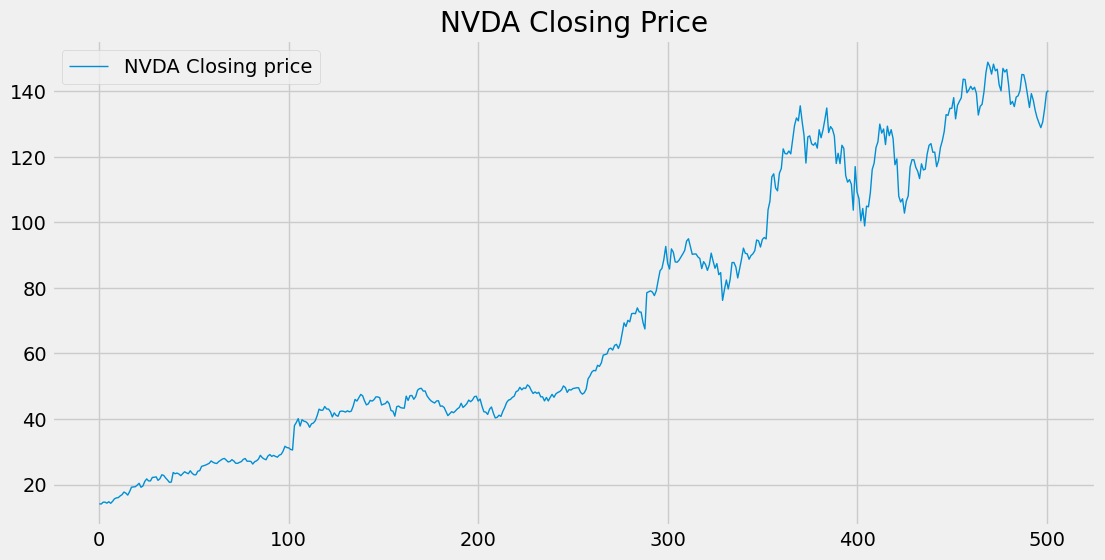

In [51]:
# CLOSING PRICES

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label = f'{stock} Closing price', linewidth= 1)
plt.title(f'{stock} Closing Price')
plt.legend()
plt.show()

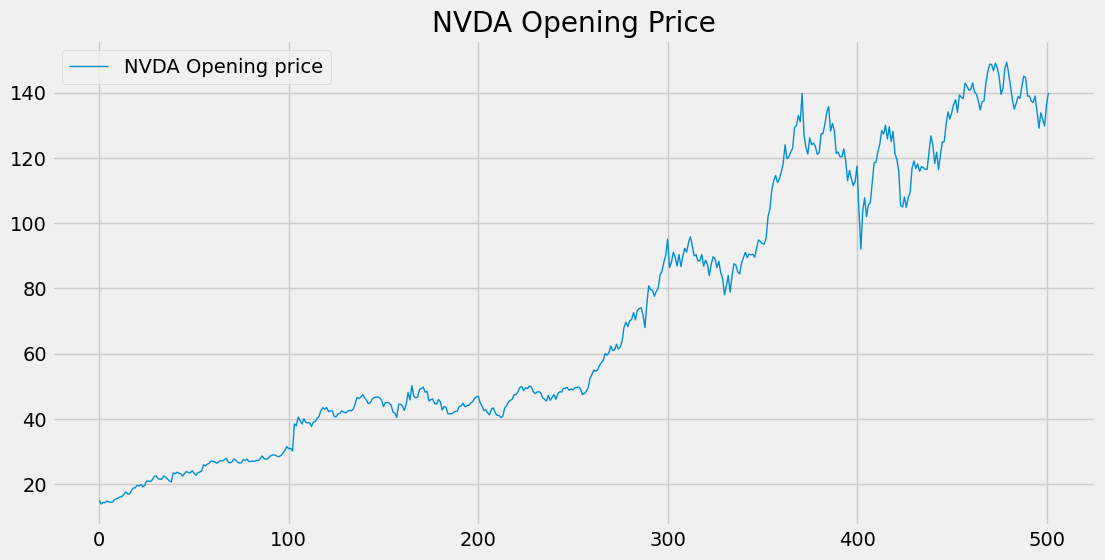

In [53]:
# OPENING PRICES

plt.figure(figsize=(12,6))
plt.plot(data['Open'], label = f'{stock} Opening price', linewidth= 1)
plt.title(f'{stock} Opening Price')
plt.legend()
plt.show()

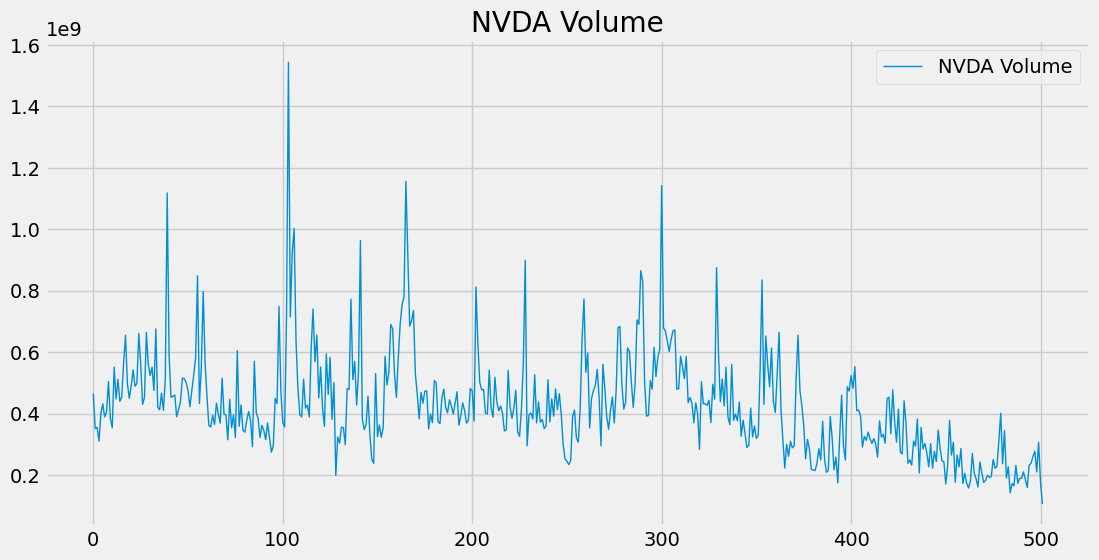

In [55]:
# VOLUME OVER TIME


plt.figure(figsize=(12,6))
plt.plot(data['Volume'], label = f'{stock} Volume', linewidth= 1)
plt.title(f'{stock} Volume')
plt.legend()
plt.show()

In [57]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [59]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [61]:
df01.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0


In [66]:
data_rolled_100 = data.Close.rolling(100).mean()
data_rolled_200 = data.Close.rolling(200).mean()

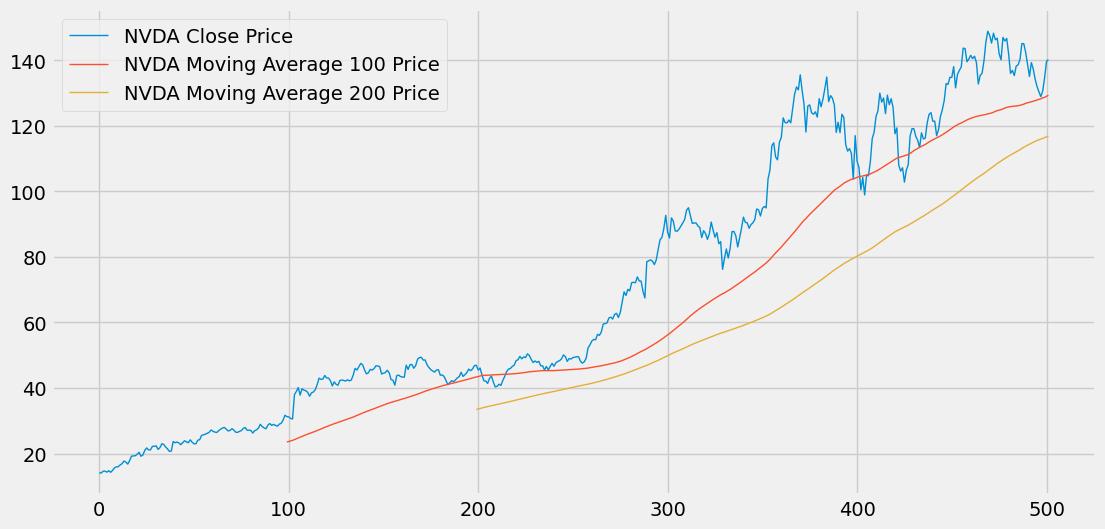

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(data_rolled_100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(data_rolled_200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [71]:
ema100 = data.Close.ewm(span=100, adjust = False).mean()
ema200 = data['Close'].ewm(span=200, adjust = False).mean()

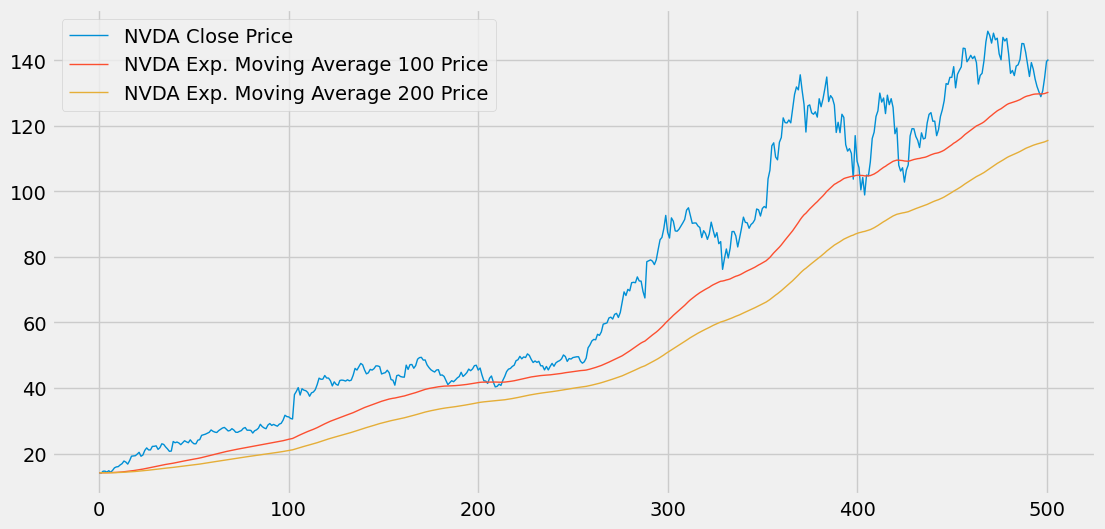

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(data.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()